In [1]:
# import maboss, os 
# cwd = os.getcwd()
# print(cwd)
import os, sys, maboss, colomoto
# import sys
print(sys.path)

['/mnt/e/Cancer_sysbio/+ PerMedCoE/resultats/PhysiBoSS-COVID/Boolean models', '/home/amontagu2/.vscode-server/extensions/ms-toolsai.jupyter-2021.3.619093157/pythonFiles', '/home/amontagu2/.vscode-server/extensions/ms-toolsai.jupyter-2021.3.619093157/pythonFiles/lib/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/amontagu2/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/home/amontagu2/.local/lib/python3.8/site-packages/IPython/extensions', '/home/amontagu2/.ipython']


In [ ]:
# os.system("/home/amontagu2/.local/share/colomoto/bin/MaBoSS_128n -c ./Sizek_model.cfg -o out ./Sizek_model.bnd ")

In [3]:
model = maboss.load( 
    "Sizek_model.bnd",
    "Sizek_model.cfg"
)

### Drawing the interaction graph

In [4]:
mini_model = maboss.to_minibn(model)

# computing graph layout...


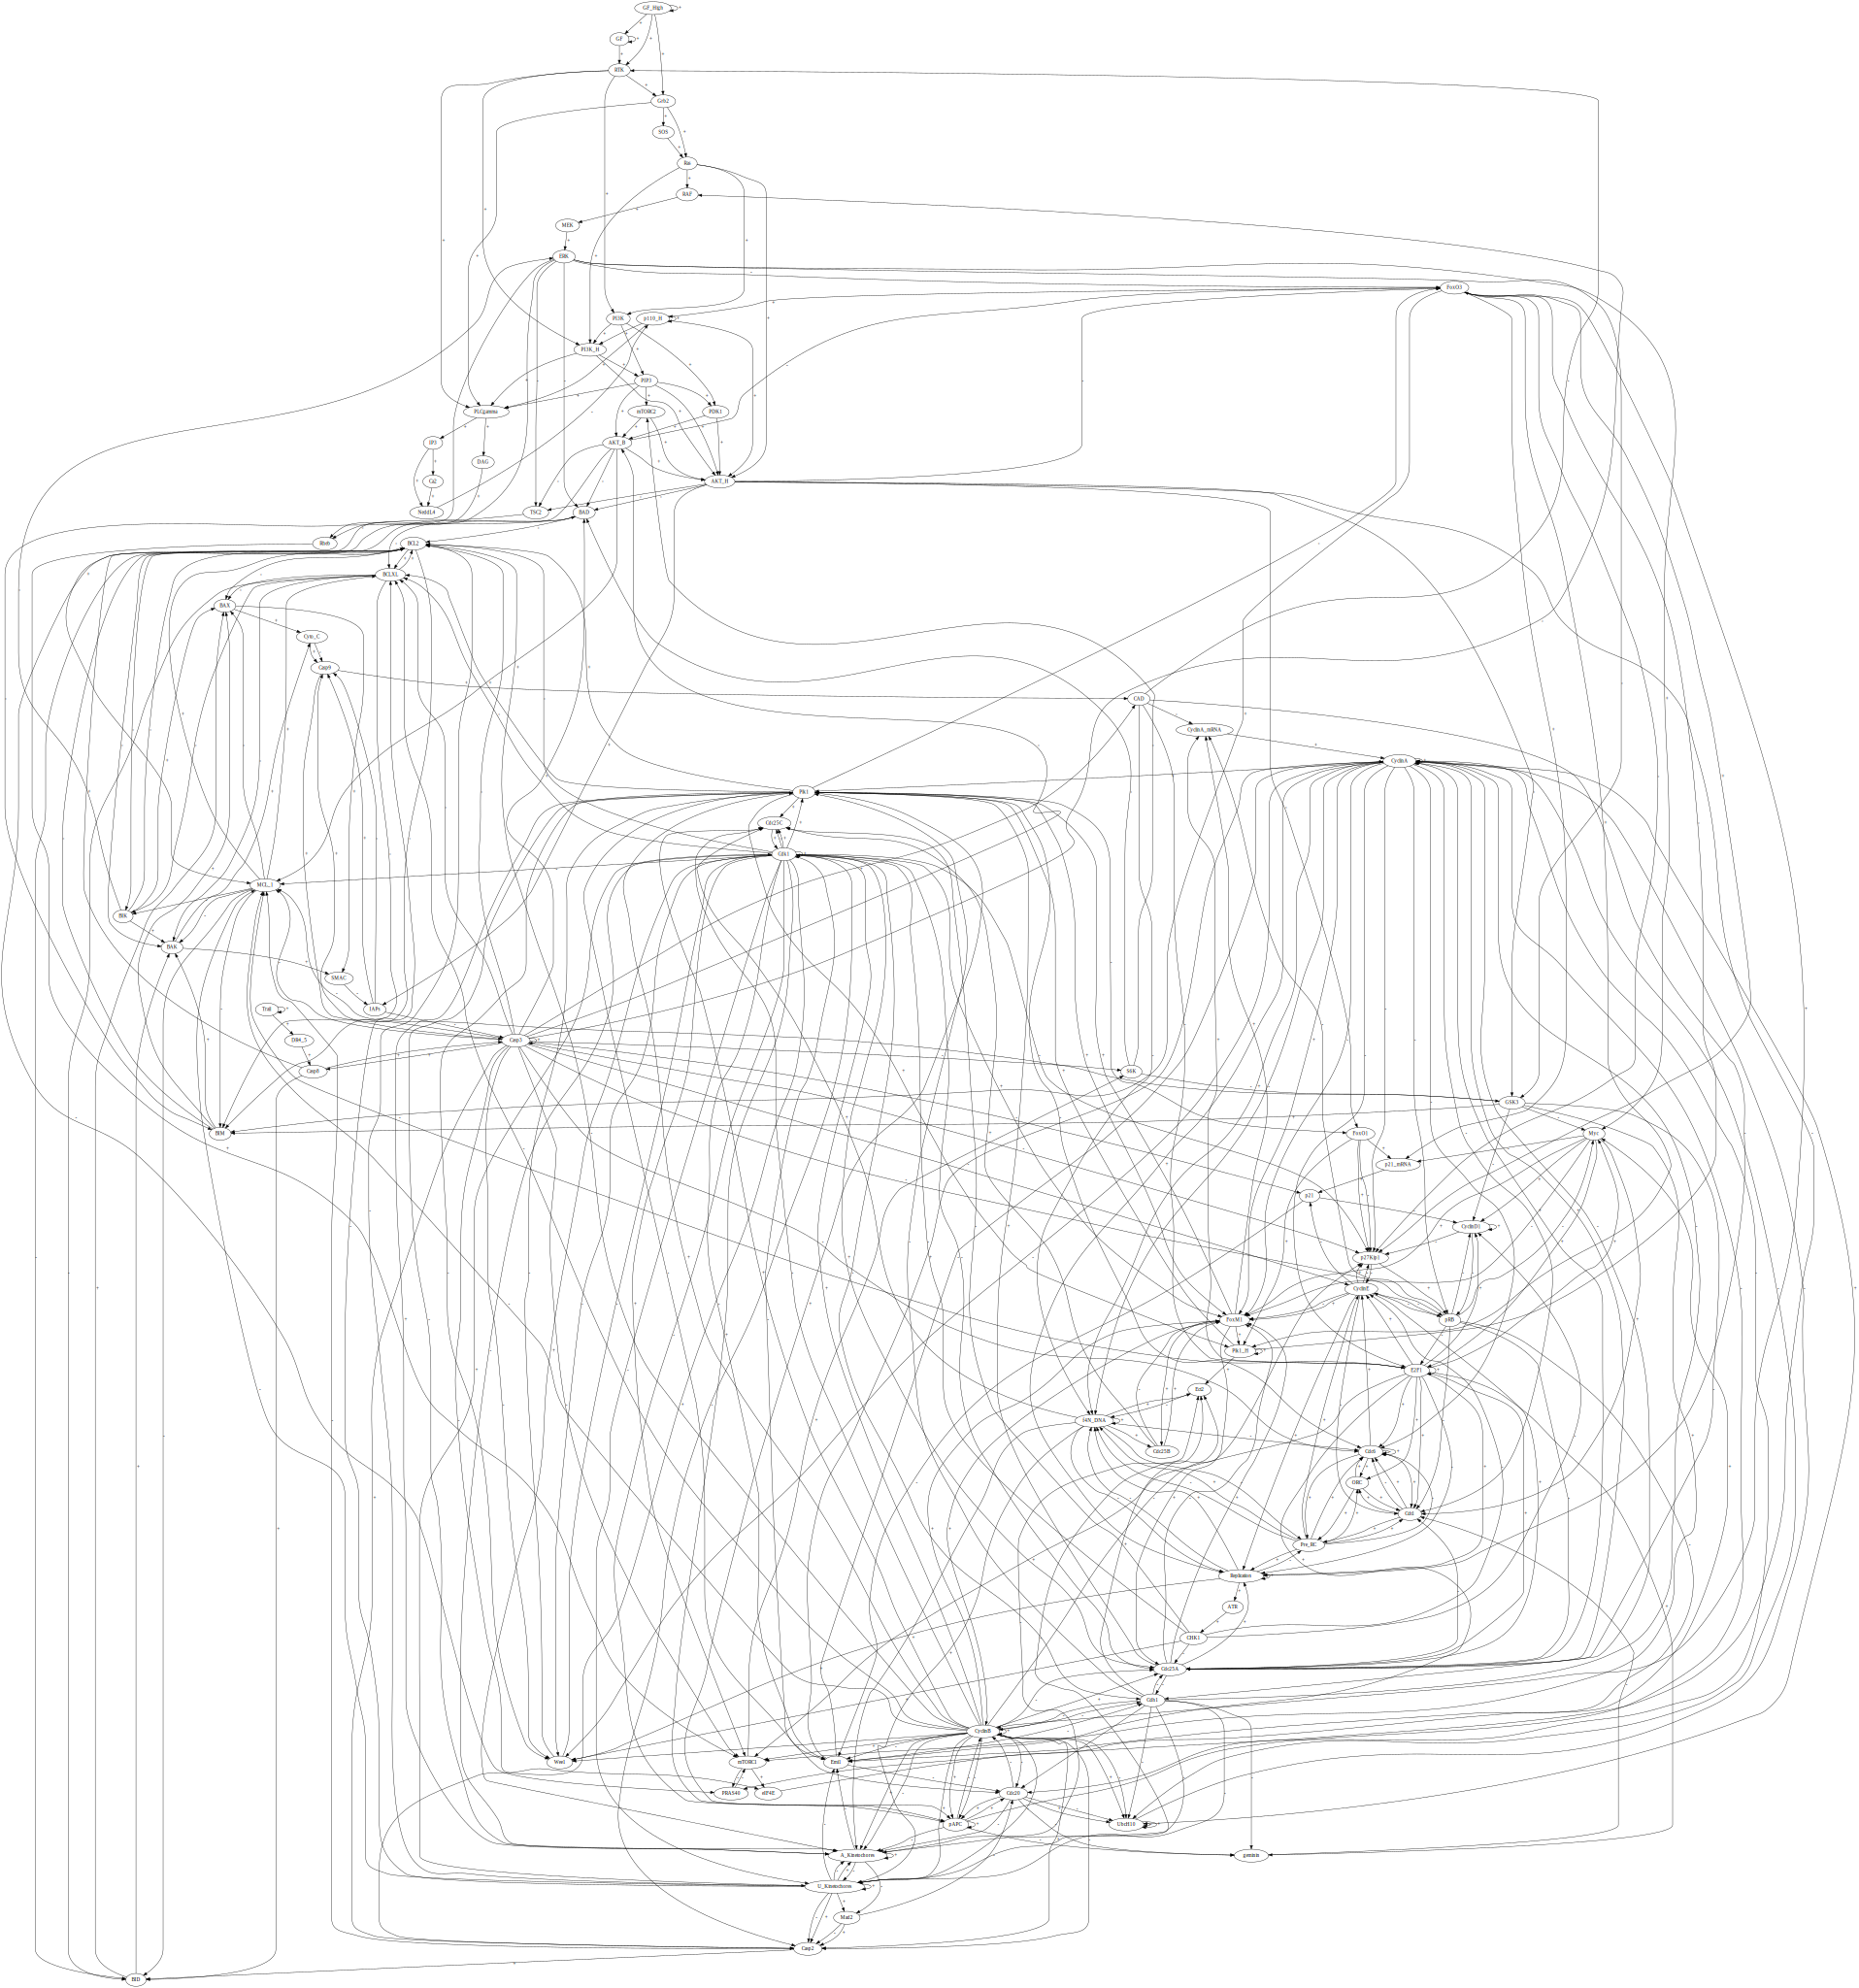

In [5]:
mini_model.influence_graph()

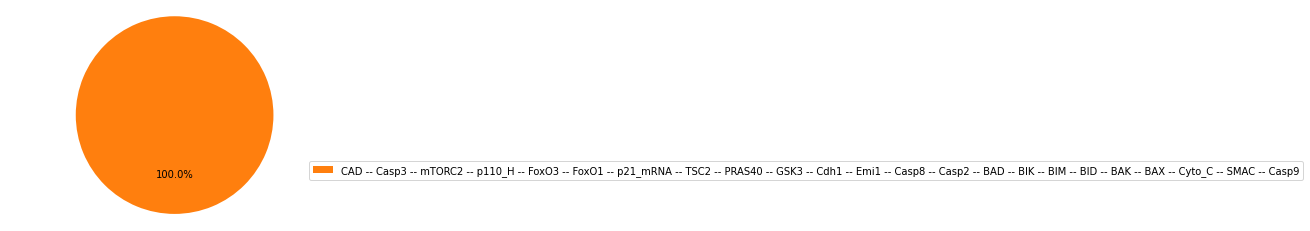

In [25]:
res1 = model.run()
res1.plot_piechart()

# COVID

# computing graph layout...


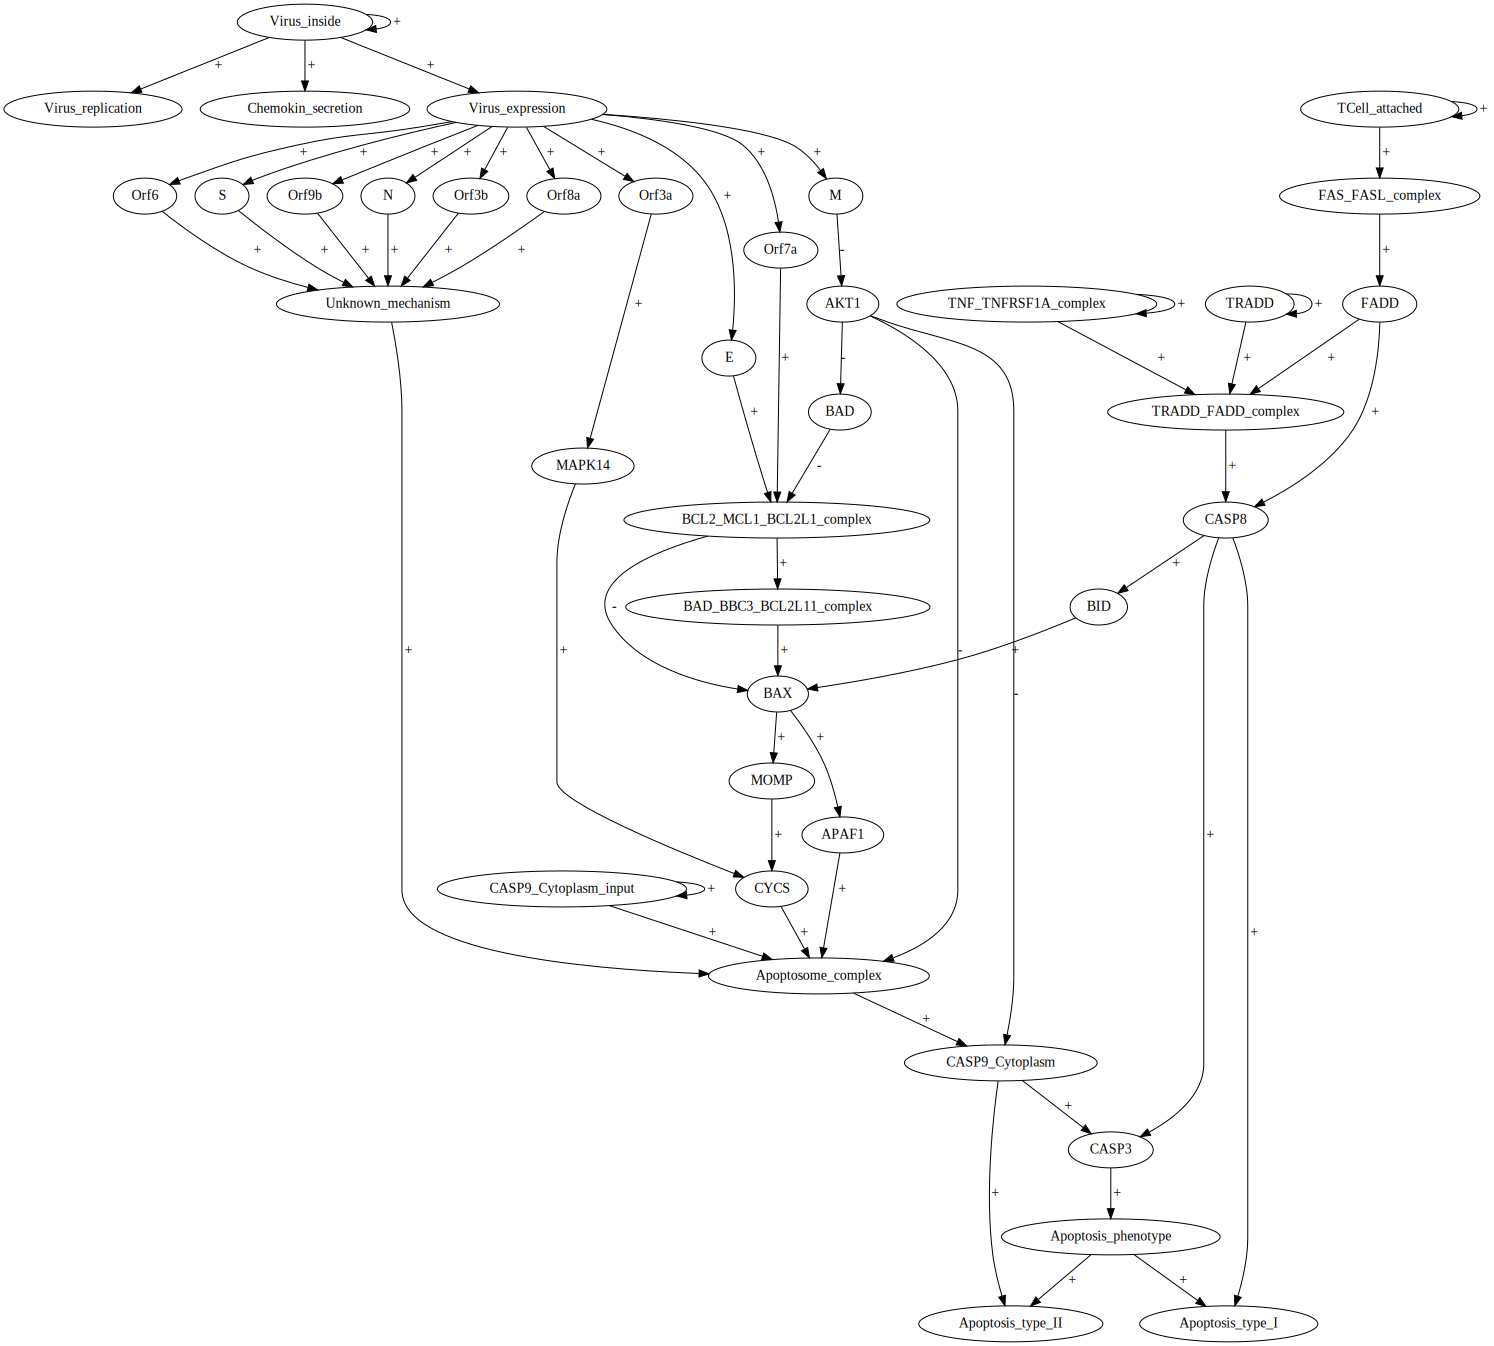

In [14]:
model2=maboss.load("epithelial_cell.bnd","epithelial_cell.cfg")
# mini_model = maboss.to_minibn(model2)
# mini_model.influence_graph()
res2 = model2.run()
# plotly.plotly.init_notebook_mode(connected=False)
res2.plot_piechart()
mini_model2 = maboss.to_minibn(model2)
mini_model2.influence_graph()

### Wild type simulation

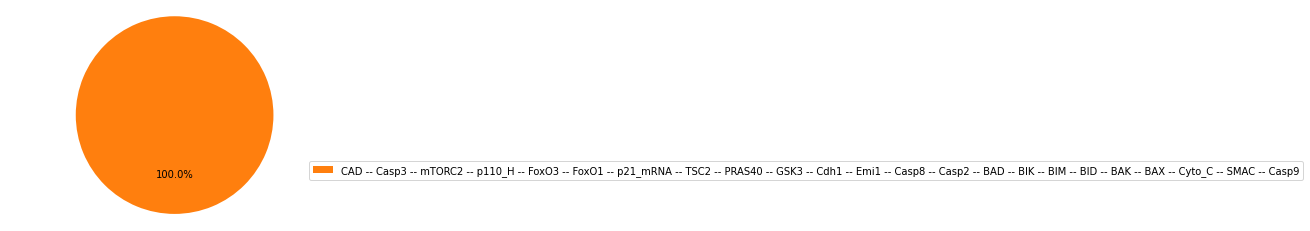

In [6]:
res1 = model.run()
res1.plot_piechart()

### Virus simulation

In [15]:
model_virus = model2.copy()
model_virus.network.set_istate(
    'Virus_inside', [0, 1]
)

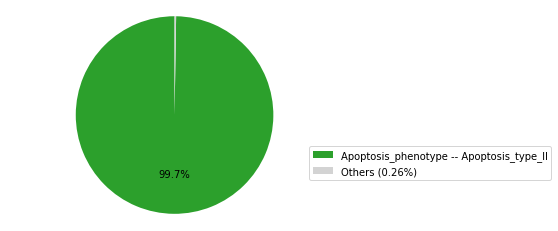

In [16]:
res_virus = model_virus.run()
res_virus.plot_piechart()

### CD8 simulation

In [17]:
model_cd8 = model2.copy()
model_cd8.network.set_istate('TCell_attached', [0, 1])

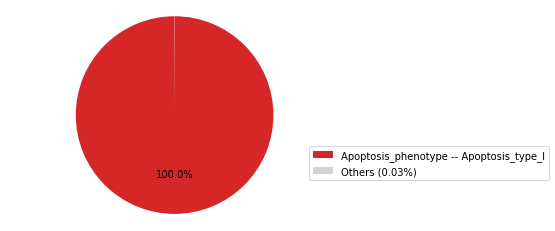

In [18]:
res_cd8 = model_cd8.run()
res_cd8.plot_piechart()

### Virus + CD8 simulation

In [19]:
model_both = model2.copy()
model_both.network.set_istate('Virus_inside', [0, 1])
model_both.network.set_istate('TCell_attached', [0, 1])

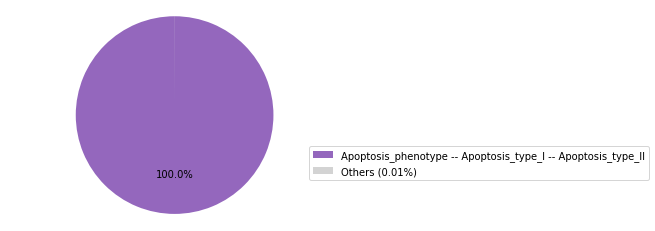

In [20]:
res_both = model_both.run()
res_both.plot_piechart()

### M mutant

In [21]:
model_m_mutant = model_virus.copy()
# model_m_mutant.mutate('M', 'OFF')
model_m_mutant.param['$M_ko'] = 1

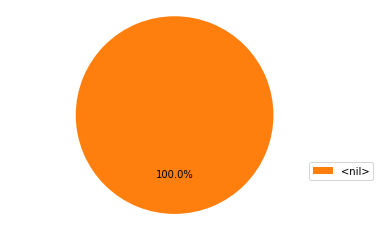

In [22]:
res_m_mutant = model_m_mutant.run()
res_m_mutant.plot_piechart()

### FADD mutant

In [23]:
model_fadd_mutant = model_cd8.copy()
model_fadd_mutant.param['$FADD_ko'] = 1

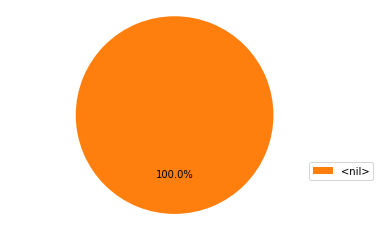

In [24]:
res_fadd_mutant = model_fadd_mutant.run()
res_fadd_mutant.plot_piechart()